# Sentdex: Neural Networks and Deep Learning 2: Handling Data

* Getting, preparing, formatting etc. data is very important and most of the time is spent on that.
* Torchvision is used to import datasets


In [2]:
import torch
import torchvision
from torchvision import transforms
from torchvision import datasets

ImportError: cannot import name '_imaging' from 'PIL' (C:\Users\aseem\AppData\Roaming\Python\Python38\site-packages\PIL\__init__.py)

* Its important to split your training and test data sets,     
the model should never see the test dataset until the time of testing,                   
  otherwise the model will report higher accuracy than it actually is.

In [ ]:
train = datasets.MNIST("", train = True, download = True, 
                       transform = transforms.Compose([transforms.ToTensor()])) 

test = datasets.MNIST("", train = False, download = True,
                       transform = transforms.Compose([transforms.ToTensor()])) 

* The NN model looks for the shortest path to decrease the loss/cost function.                                                                   
We use batches to restrict this in order to train for generalisation.

In [5]:
trainset = torch.utils.data.DataLoader(train, batch_size =10, shuffle = True)

testset = torch.utils.data.DataLoader(test, batch_size =10, shuffle = True)

In [ ]:
for data in trainset:
  print(data)
  break

In [7]:
x, y = data[0][0], data[1][0]

print(y)


tensor(8)


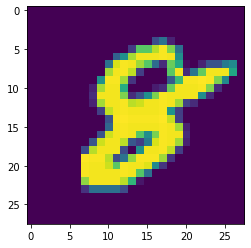

In [14]:
import matplotlib.pyplot as plt

plt.imshow(data[0][0].view(28,28))
plt.show()

In [13]:
print(data[0][0].shape)

torch.Size([1, 28, 28])


* Its important for our data to be good in quaility. Or else tradh in and trash out. 

* So we need a balanced data set. That means there are the same number of examples for each classification in training.



In [19]:
total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0 }

for data in trainset:
  Xs, ys = data
  for y in ys:
    counter_dict[int(y)] += 1
    total+=1

print(counter_dict)    
print(total)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
60000


In [20]:
for i in counter_dict:
    print(f"{i}: {counter_dict[i]/total*100.0}%")

0: 9.871666666666666%
1: 11.236666666666666%
2: 9.93%
3: 10.218333333333334%
4: 9.736666666666666%
5: 9.035%
6: 9.863333333333333%
7: 10.441666666666666%
8: 9.751666666666667%
9: 9.915000000000001%


* This data is fairly balanced, no single class has percentage that is too big or too small.